In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from src_code.support_function import *

# Import data

In [2]:
data_monthly_all = pd.read_csv('./data/data_all_var.csv').set_index('date') # has gov_bond, has VN CPI
data_monthly = pd.read_csv('./data/data_long_month.csv').set_index('date') # no gov_bond, has VN CPI
data_daily_0 = pd.read_csv('./data/data_long.csv').set_index('date') # no gov_bond, no VN CPI
data_daily_noMacro = pd.read_csv('./data/data_short.csv').set_index('date') # has gov_bond, no VN CPI

In [3]:
# Data shape
print(f"Monthly data all variables: {data_monthly_all.shape}")
print(f"Monthly data without Government Bond: {data_monthly.shape}")
print(f"Daily data without macro variables: {data_daily_noMacro.shape}")
print(f"Daily data without Government Bond and CPI: {data_daily_0.shape}")

Monthly data all variables: (90, 7)
Monthly data without Government Bond: (261, 6)
Daily data without macro variables: (1817, 6)
Daily data without Government Bond and CPI: (5103, 5)


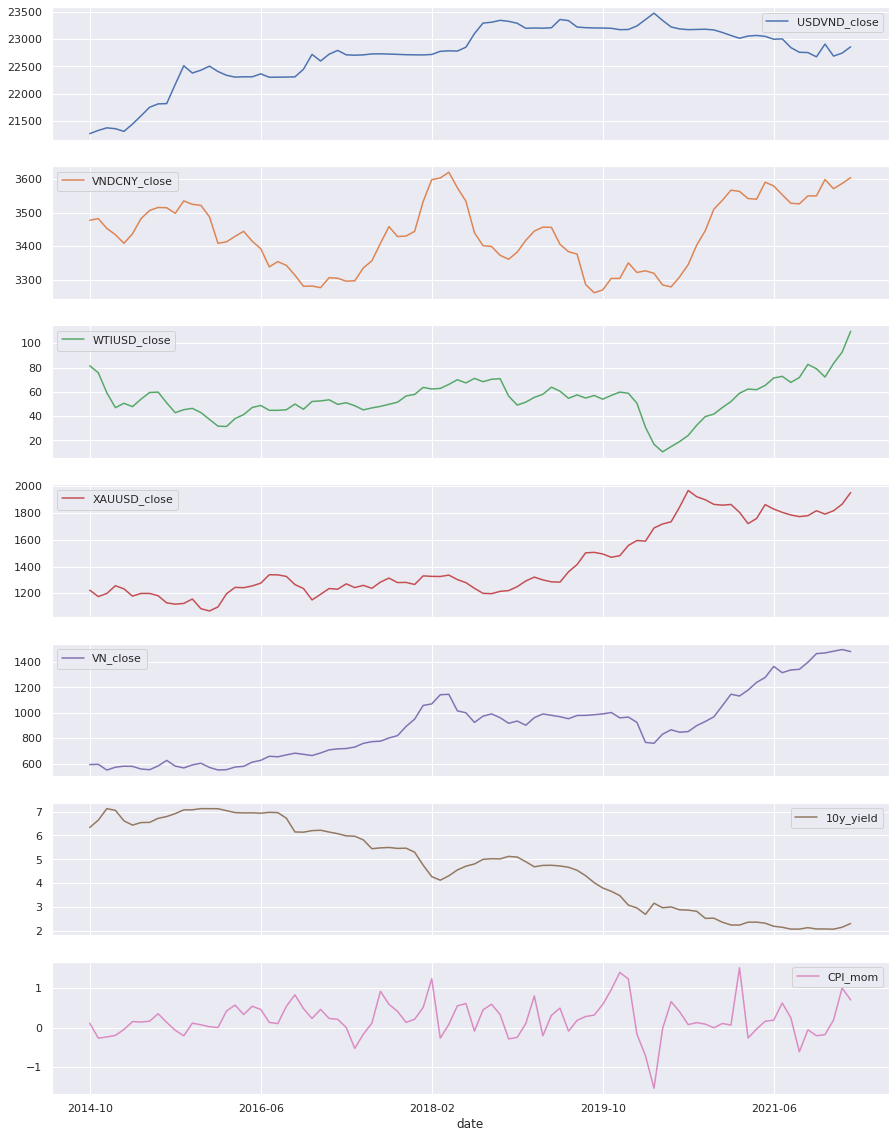

In [4]:
data_monthly_all.plot(kind = 'line', figsize = (15,20), subplots = True)
plt.show();

## ANALYSIS

In [5]:
list_correlation = list()

In [6]:
data_monthly_all_pctChange = data_monthly_all.copy()
data_monthly_all_pctChange[data_monthly_all_pctChange.columns.difference(['CPI_mom'])] = data_monthly_all_pctChange[data_monthly_all_pctChange.columns.difference(['CPI_mom'])].pct_change()
data_monthly_all_pctChange.index = pd.DatetimeIndex(data_monthly_all_pctChange.index)
data_monthly_all_pctChange.index = data_monthly_all_pctChange.index.to_period("M")
data_monthly_all_pctChange = data_monthly_all_pctChange.dropna()
data_monthly_all_pctChange

,USDVND_close,VNDCNY_close,WTIUSD_close,XAUUSD_close,VN_close,10y_yield,CPI_mom
date,,,,,,,
2014-11,0.002814,0.001412,-0.071462,-0.039095,0.003369,0.048642,-0.2700
2014-12,0.002195,-0.008316,-0.216584,0.019869,-0.076246,0.072358,-0.2400
2015-01,-0.000739,-0.005393,-0.207837,0.048117,0.040954,-0.010043,-0.2000
2015-02,-0.002293,-0.007435,0.077188,-0.018435,0.014090,-0.062069,-0.0500
2015-03,0.006265,0.008270,-0.054328,-0.044125,-0.002719,-0.026823,0.1500
...,...,...,...,...,...,...,...
2021-11,-0.003429,0.000013,-0.043299,0.020759,0.048652,-0.025019,-0.2078
2021-12,0.010298,0.013628,-0.086465,-0.013909,0.003699,-0.000526,-0.1816
2022-01,-0.009612,-0.007553,0.154829,0.014007,0.009150,-0.003731,0.1916


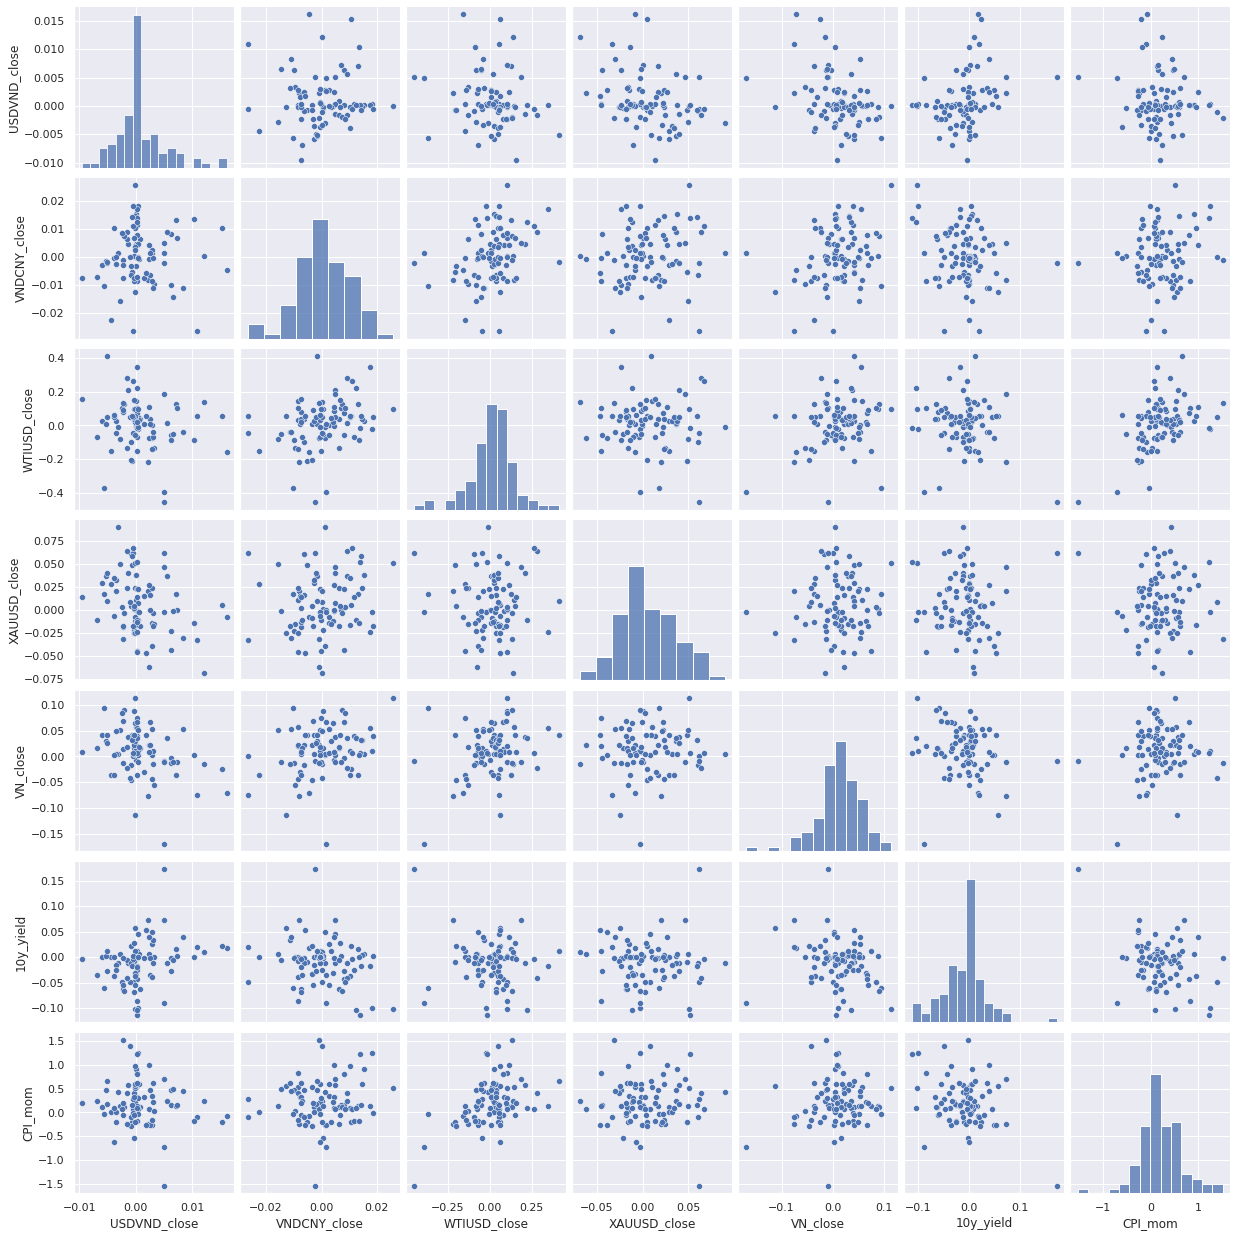

In [7]:
sns.pairplot(data_monthly_all_pctChange);

In [8]:
data_monthly_pctChange = data_monthly.copy()
data_monthly_pctChange[data_monthly_pctChange.columns.difference(['CPI_mom'])] = data_monthly_pctChange[data_monthly_pctChange.columns.difference(['CPI_mom'])].pct_change()
data_monthly_pctChange.index = pd.DatetimeIndex(data_monthly_pctChange.index)
data_monthly_pctChange.index = data_monthly_pctChange.index.to_period("M")
data_monthly_pctChange = data_monthly_pctChange.dropna()
data_monthly_pctChange

,USDVND_close,VNDCNY_close,WTIUSD_close,XAUUSD_close,VN_close,CPI_mom
date,,,,,,
2000-08,0.000914,0.000865,0.141199,-0.009433,0.108276,0.1000
2000-09,0.004032,0.004157,0.084611,-0.003616,0.037389,-0.2000
2000-10,0.018334,0.018344,-0.032018,-0.013589,0.117583,0.1000
2000-11,0.003261,0.003406,0.045222,-0.015213,0.205458,0.9000
2000-12,0.004539,0.004555,-0.166469,0.023481,0.198826,0.1000
...,...,...,...,...,...,...
2021-11,-0.003429,0.000013,-0.043299,0.020759,0.048652,-0.2078
2021-12,0.010440,0.013703,-0.087233,-0.014363,0.003569,-0.1816
2022-01,-0.009750,-0.007626,0.155800,0.014474,0.009280,0.1916


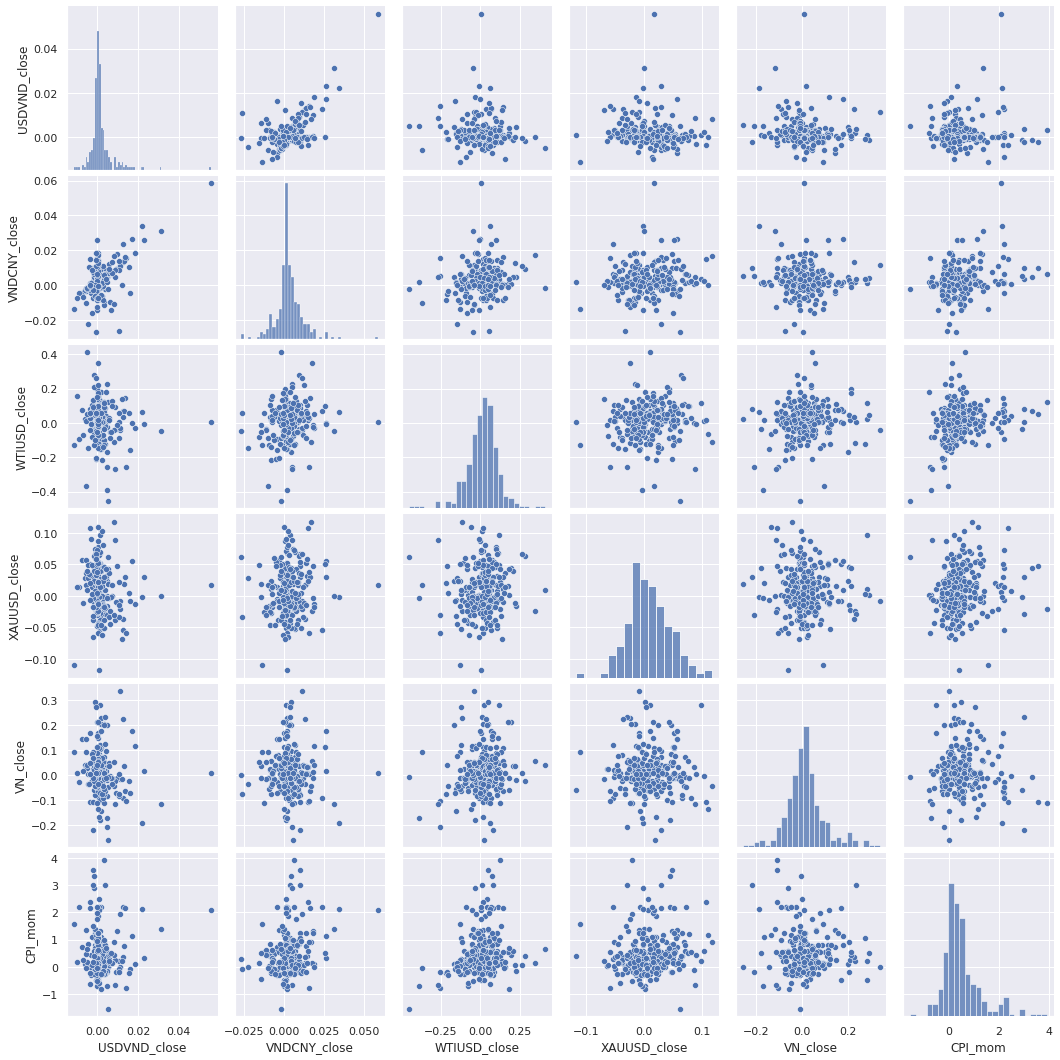

In [49]:
sns.pairplot(data_monthly_pctChange);

### commodity vs fx rate

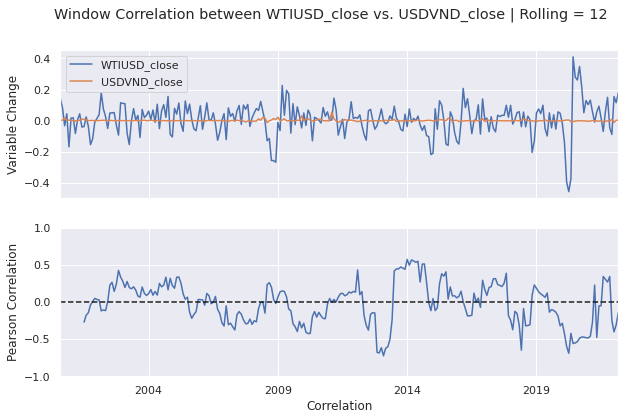

In [9]:
wti_usdvnd_corr = plot_windowCorrelation(data_monthly_pctChange, "WTIUSD_close", "USDVND_close", name_plot = None, r_window_size = 12)

In [10]:
list_correlation.append(wti_usdvnd_corr)

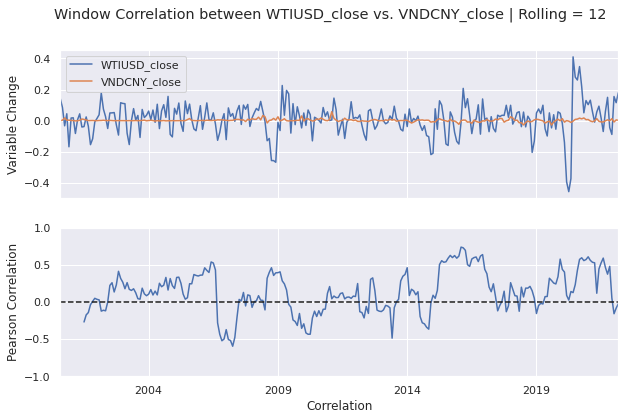

In [11]:
wti_vndcny_corr = plot_windowCorrelation(data_monthly_pctChange, "WTIUSD_close", "VNDCNY_close", name_plot = None, r_window_size = 12)

In [12]:
list_correlation.append(wti_vndcny_corr)

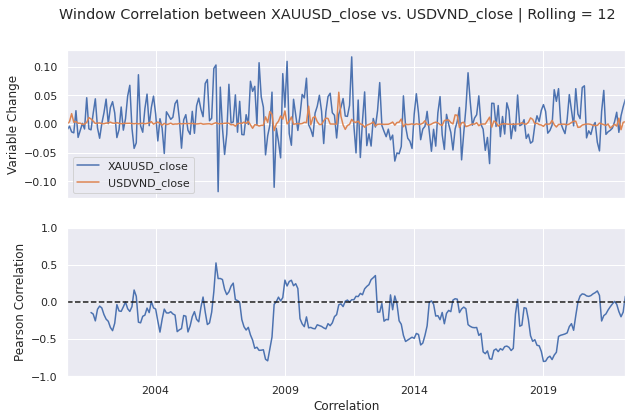

In [13]:
xau_usdvnd_corr = plot_windowCorrelation(data_monthly_pctChange, "XAUUSD_close", "USDVND_close", name_plot = None, r_window_size = 12)

In [14]:
list_correlation.append(xau_usdvnd_corr)

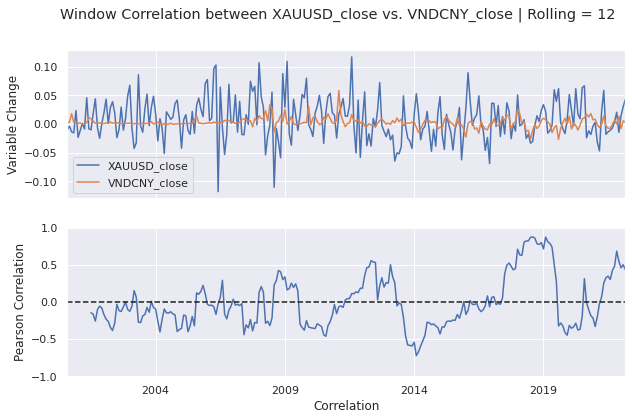

In [15]:
xau_vndcny_corr = plot_windowCorrelation(data_monthly_pctChange, "XAUUSD_close", "VNDCNY_close", name_plot = None, r_window_size = 12)

In [16]:
xau_vndcny_corr.index

PeriodIndex(['2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01',
             '2001-02', '2001-03', '2001-04', '2001-05',
             ...
             '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11',
             '2021-12', '2022-01', '2022-02', '2022-03'],
            dtype='period[M]', name='date', length=260)

In [17]:
list_correlation.append(xau_vndcny_corr)

### commodity vs vnindex

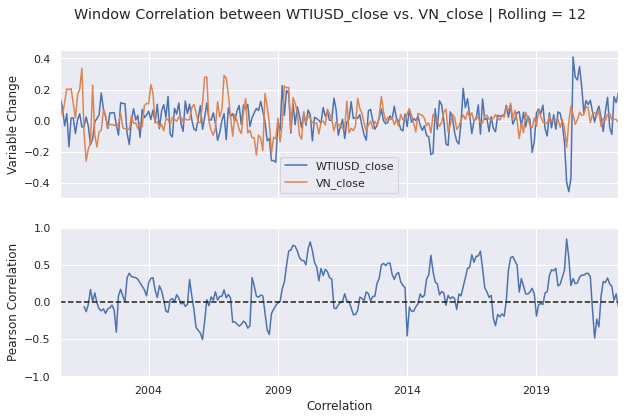

In [18]:
wti_vni_corr = plot_windowCorrelation(data_monthly_pctChange, "WTIUSD_close", "VN_close", name_plot = None, r_window_size = 12)

In [19]:
list_correlation.append(wti_vni_corr)

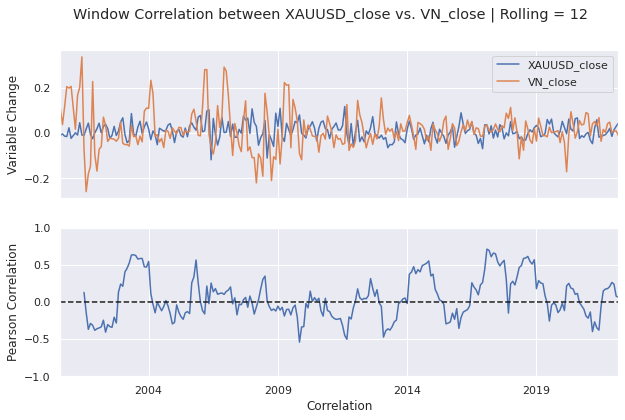

In [20]:
xau_vni_corr = plot_windowCorrelation(data_monthly_pctChange, "XAUUSD_close", "VN_close", name_plot = None, r_window_size = 12)

In [21]:
list_correlation.append(xau_vni_corr)

## with tpcp

### commodity vs Gov bond

In [22]:
data_daily_noMacro_pctChange = data_daily_noMacro.pct_change().dropna()
data_daily_noMacro_pctChange.index = pd.DatetimeIndex(data_daily_noMacro_pctChange.index)
data_daily_noMacro_pctChange = data_daily_noMacro_pctChange.resample('M').sum()
data_daily_noMacro_pctChange.index = data_daily_noMacro_pctChange.index.to_period("M")
data_daily_noMacro_pctChange

,USDVND_close,VNDCNY_close,WTIUSD_close,XAUUSD_close,VN_close,10y_yield
date,,,,,,
2014-10,0.001177,0.002943,-0.024495,-0.059219,0.020244,0.015958
2014-11,0.003414,-0.001553,-0.191579,-0.004161,-0.058090,0.085957
2014-12,0.001646,-0.008509,-0.199505,0.016218,-0.035315,0.037659
2015-01,-0.003287,-0.010307,-0.104931,0.082216,0.055173,-0.071571
2015-02,0.001562,-0.001550,0.044106,-0.055538,0.029012,-0.030176
...,...,...,...,...,...,...
2021-12,0.006134,0.007995,0.118204,0.030647,0.014648,0.004967
2022-01,-0.007897,-0.009172,0.151976,-0.020125,-0.011238,-0.004647
2022-02,0.007050,0.015292,0.106017,0.063792,0.008032,0.069684


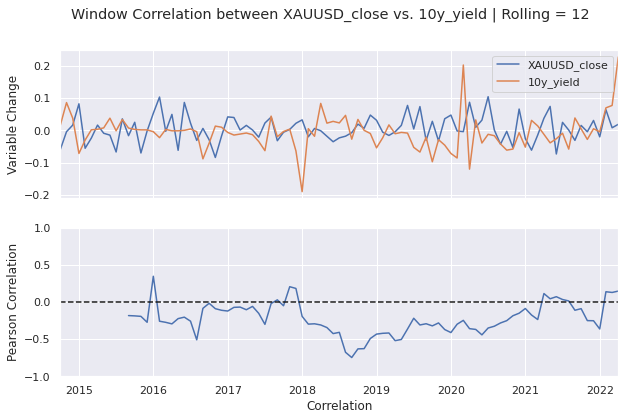

In [23]:
xau_vnbond_corr = plot_windowCorrelation(data_daily_noMacro_pctChange, "XAUUSD_close", "10y_yield", name_plot = None, r_window_size = 12)

In [24]:
list_correlation.append(xau_vnbond_corr)

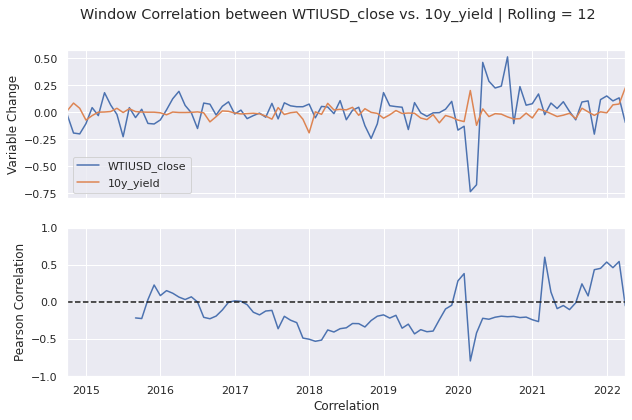

In [25]:
wti_vnbond_corr = plot_windowCorrelation(data_daily_noMacro_pctChange, "WTIUSD_close", "10y_yield", name_plot = None, r_window_size = 12)

In [26]:
list_correlation.append(wti_vnbond_corr)

### fx vs gov bond

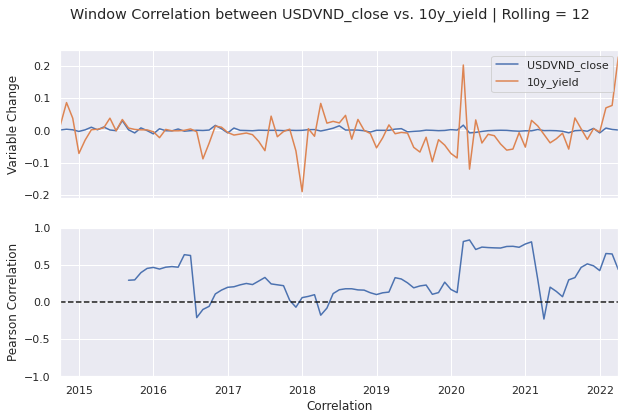

In [27]:
usdvnd_vnbond_corr = plot_windowCorrelation(data_daily_noMacro_pctChange, "USDVND_close", "10y_yield", name_plot = None, r_window_size = 12)

In [28]:
list_correlation.append(usdvnd_vnbond_corr)

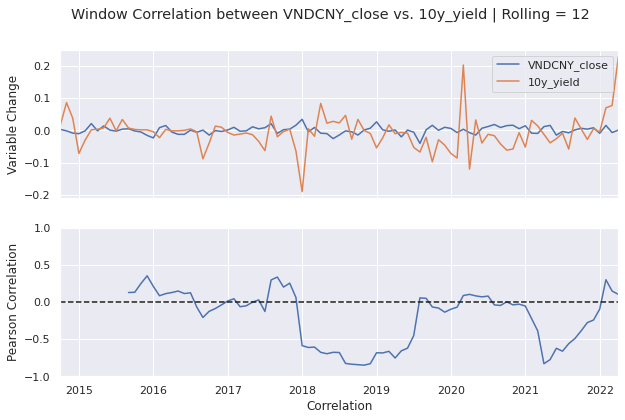

In [29]:
vndcny_vnbond_corr = plot_windowCorrelation(data_daily_noMacro_pctChange, "VNDCNY_close", "10y_yield", name_plot = None, r_window_size = 12)

In [30]:
list_correlation.append(vndcny_vnbond_corr)

### vni vs gov bond

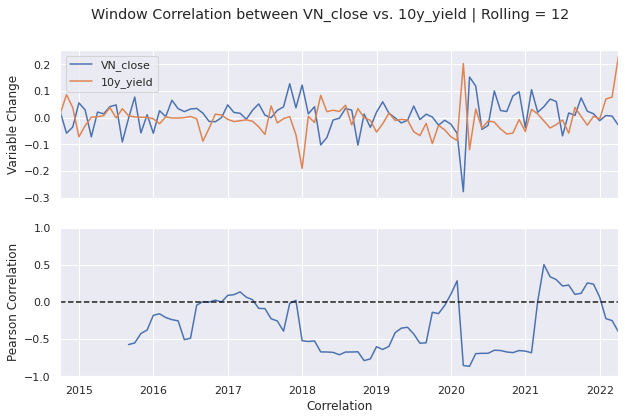

In [31]:
vni_vnbond_corr = plot_windowCorrelation(data_daily_noMacro_pctChange, "VN_close", "10y_yield", name_plot = None, r_window_size = 12)

In [32]:
list_correlation.append(vni_vnbond_corr)

## with cpi

### commodity vs cpi

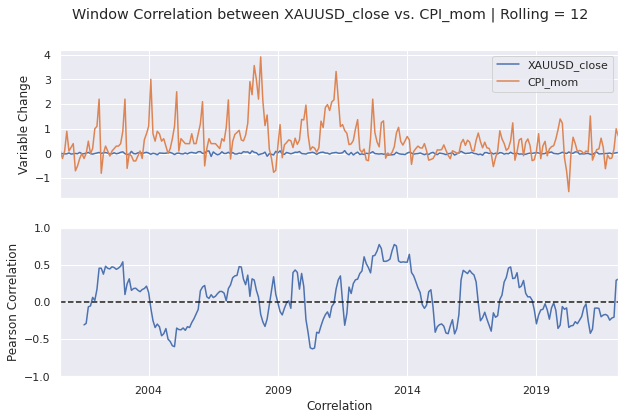

In [33]:
xau_cpi_corr = plot_windowCorrelation(data_monthly_pctChange, "XAUUSD_close", "CPI_mom", name_plot = None, r_window_size = 12)

In [34]:
list_correlation.append(xau_cpi_corr)

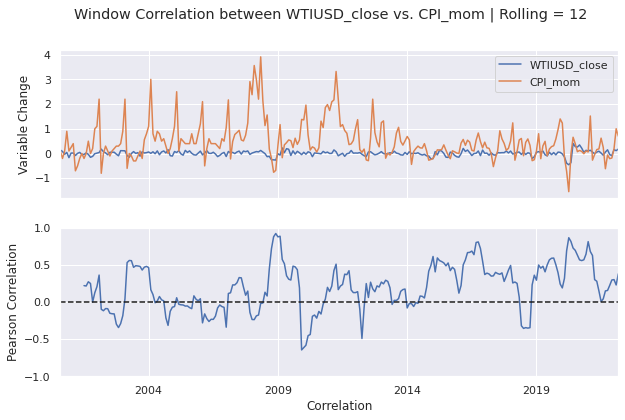

In [35]:
wti_cpi_corr = plot_windowCorrelation(data_monthly_pctChange, "WTIUSD_close", "CPI_mom", name_plot = None, r_window_size = 12)

In [36]:
list_correlation.append(wti_cpi_corr)

### fx vs cpi

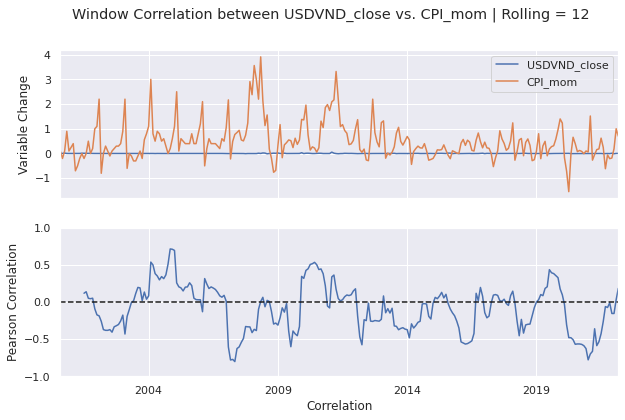

In [37]:
usdvnd_cpi_corr = plot_windowCorrelation(data_monthly_pctChange, "USDVND_close", "CPI_mom", name_plot = None, r_window_size = 12)

In [38]:
list_correlation.append(usdvnd_cpi_corr)

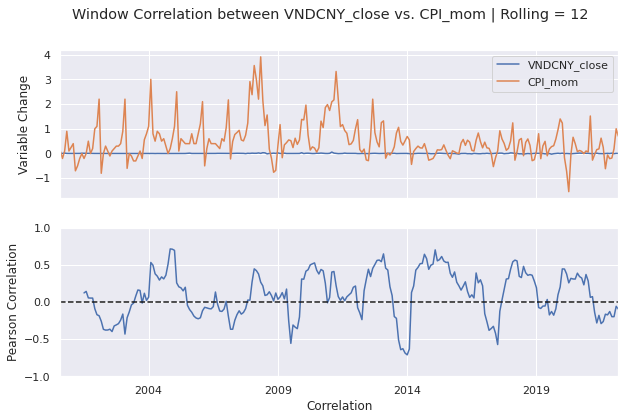

In [39]:
vndcny_cpi_corr = plot_windowCorrelation(data_monthly_pctChange, "VNDCNY_close", "CPI_mom", name_plot = None, r_window_size = 12)

In [40]:
list_correlation.append(vndcny_cpi_corr)

### vnindex vs cpi

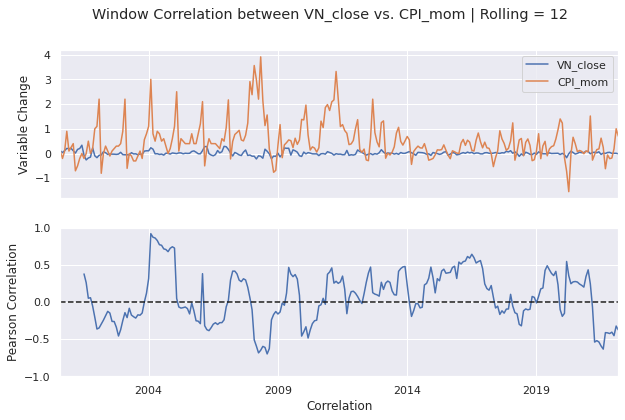

In [41]:
vni_cpi_corr = plot_windowCorrelation(data_monthly_pctChange, "VN_close", "CPI_mom", name_plot = None, r_window_size = 12)

In [42]:
list_correlation.append(vni_cpi_corr)

### gov bond vs cpi

In [43]:
data_monthly_bond_macro = data_monthly_all[['10y_yield', 'CPI_mom']]
data_monthly_bond_macro['10y_yield'] = data_monthly_bond_macro['10y_yield'].pct_change()
data_monthly_bond_macro.index = pd.DatetimeIndex(data_monthly_bond_macro.index)
data_monthly_bond_macro.index = data_monthly_bond_macro.index.to_period("M")
data_monthly_bond_macro = data_monthly_bond_macro.dropna()

/tmp/ipykernel_10769/1782021853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_monthly_bond_macro['10y_yield'] = data_monthly_bond_macro['10y_yield'].pct_change()


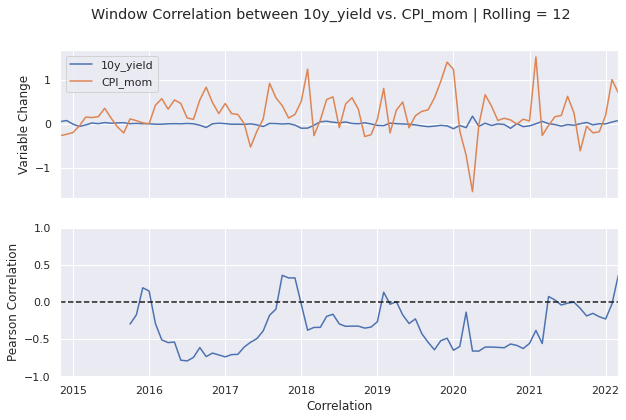

In [44]:
vnbond_cpi_corr = plot_windowCorrelation(data_monthly_bond_macro, "10y_yield", "CPI_mom", name_plot = None, r_window_size = 12)

In [45]:
list_correlation.append(vnbond_cpi_corr)

In [46]:
len(list_correlation)

17

In [47]:
from functools import reduce
corr_frame = reduce(lambda df1, df2: pd.merge(df1,df2, left_index=True, right_index=True, how = 'outer'), list_correlation)

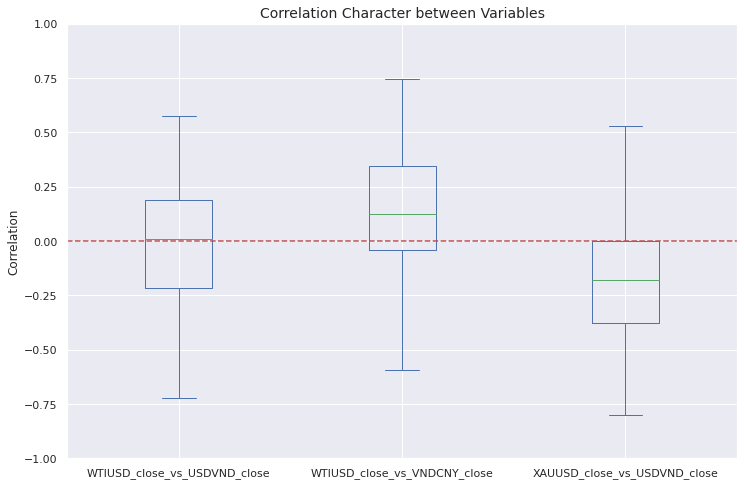

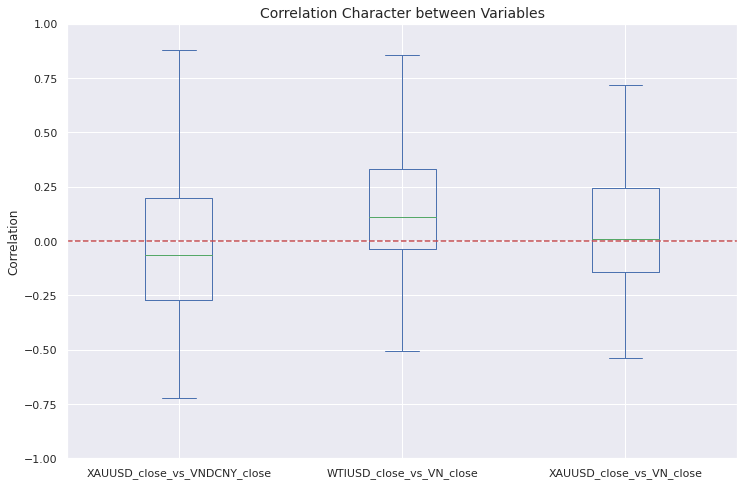

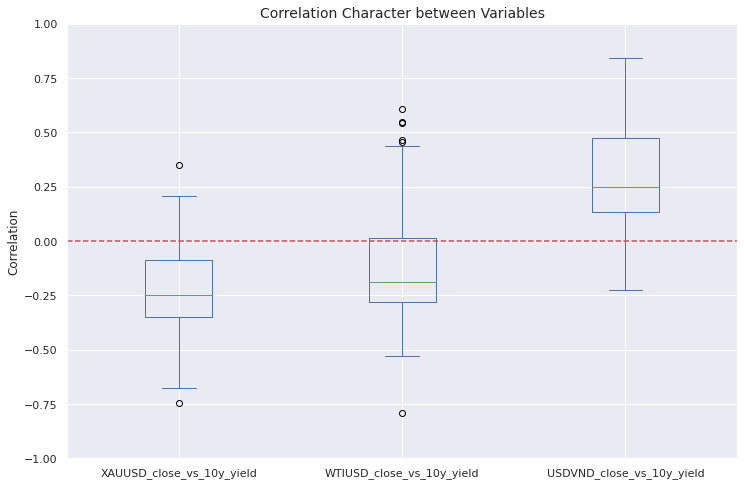

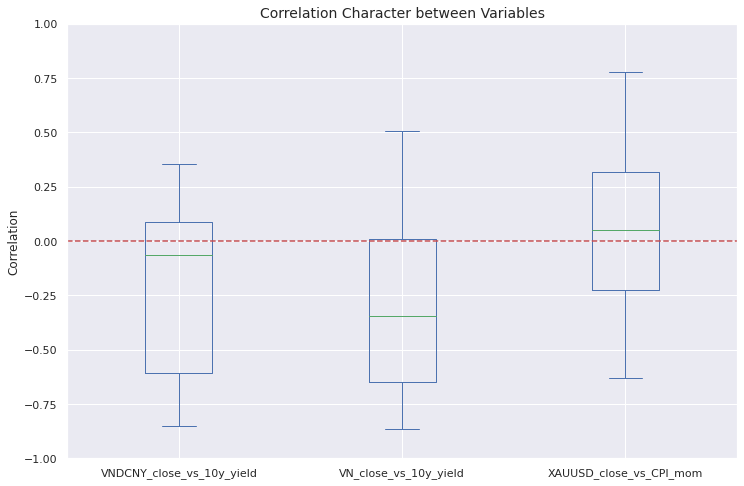

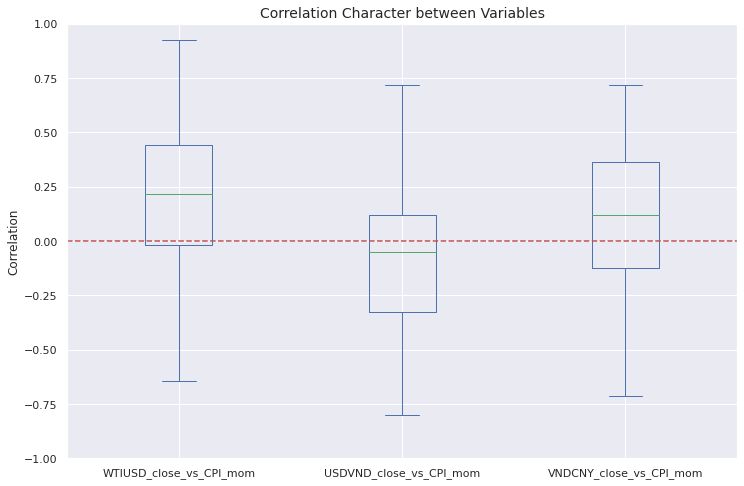

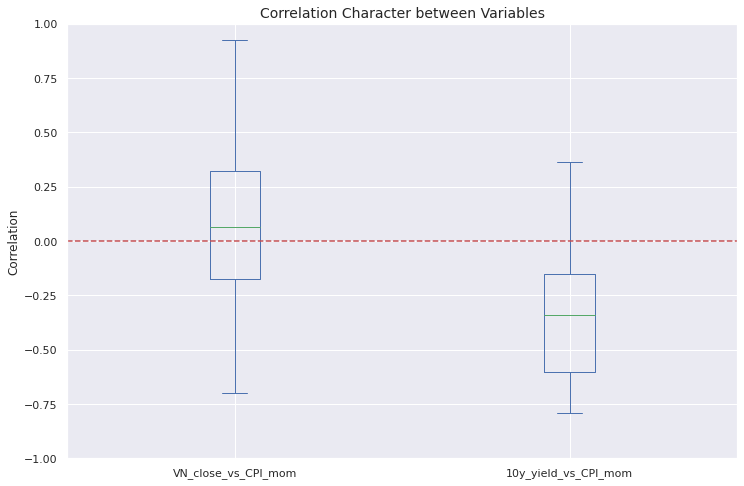

In [48]:
box_plot_corr(corr_frame)